# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [69]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create dataframe of the creadit score transactions csv file
credit_df = pd.read_csv("credit_score.csv")

# display shape of the data (rows x columns)
print("Rows x Columns of the data file =", credit_df.shape,'\n')

Rows x Columns of the data file = (1000, 87) 



## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [70]:
# Get a look at null counts
print(credit_df.isnull().sum())
# None of the columns have nulls. 
# But do they have zero values instead of nulls?

# Checking if there are any rows with all zero values
zero_rows = credit_df[(credit_df == 0).all(axis=1)]

# Display any rows with all zero values
print("\n",zero_rows)
# There are no rows where all values are zeroes. 

# Since there are no nulls and no rows full of Zeroes, no cleaning needs to be done in this section.

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

 Empty DataFrame
Columns: [CUST_ID, INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAVINGS, T_CLOTHING_12, T_CLOTHING_6, R_CLOTHING, R_CLOTHING_INCOME, R_CLOTHING_SAVINGS, R_CLOTHING_DEBT, T_EDUCATION_12, T_EDUCATION_6, R_EDUCATION, R_EDUCATION_INCOME, R_EDUCATION_SAVINGS, R_EDUCATION_DEBT, T_ENTERTAINMENT_12, T_ENTERTAINMENT_6, R_ENTERTAINMENT, R_ENTERTAINMENT_INCOME, R_ENTERTAINMENT_SAVINGS, R_ENTERTAINMENT_DEBT, T_FINES_12, T_FINES_6, R_FINES, R_FINES_INCOME, R_FINES_SAVINGS, R_FINES_DEBT, T_GAMBLING_12, T_GAMBLING_6, R_GAMBLING, R_GAMBLING_INCOME, R_GAMBLING_SAVINGS, R_GAMBLING_DEBT, T_GROCERIES_12, T_GROCERIES_6, R_GROCERIES, R_GROCERIES_INCOME, R_GROCERIES_SAVINGS, R_G

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [71]:
# exploring the datatypes, non-null counts, and column names
credit_df.info()
# There are 87 columns. 
# 2 columns are 'object' data type
# 85 columns are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [72]:
# looking for outliers 

# descriptive statistics to take a look at the min and max values of the individual columns.
credit_df.describe() 
# The MIN and MAX values of all the numerical columns are plausible values and fit thematically 
# in the dataset.
# There are no negative values in any of these columns. 

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


In [74]:
# Looking for outliers 

def identify_outliers(column_name):
    # Calculate the quartiles Q1 and Q3
    Q1 = credit_df[column_name].quantile(0.25)
    Q3 = credit_df[column_name].quantile(0.75)
    IQR = Q3 - Q1  

    # outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = credit_df[(credit_df[column_name] < lower_bound) | (credit_df[column_name] > upper_bound)]
    outlier_percentage = (outliers.shape[0]/1000)*100

    print(f'{round(outlier_percentage,2)}% of the {column_name} column is identified as outliers.')

# Calling the function for all the numerical columns except for the columns that just have the ratios computed from the
# following columns.
identify_outliers('DEBT')
identify_outliers('SAVINGS')
identify_outliers('INCOME')  
identify_outliers('CREDIT_SCORE')
identify_outliers('T_GROCERIES_12')
identify_outliers('T_CLOTHING_12') 
identify_outliers('T_HOUSING_12')
identify_outliers('T_HEALTH_12')
identify_outliers('T_TRAVEL_12') 
identify_outliers('T_ENTERTAINMENT_12')
identify_outliers('T_GAMBLING_12') 
identify_outliers('T_FINES_12')
identify_outliers('T_UTILITIES_12')
identify_outliers('T_TAX_12') 

# Although there are several outliers according to the outlier formula and the boxplots from the 
# EDA checkpoint #2, the values make sense. It is possible to have high/low income or debt or savings, etc. 
# The data is very widely spread, which is probably why there are several datapoints shown outside of the 
# intequartile range.

# 18.4% of the Total amount spent on Gambling over 12 months (T_GAMBLING_12) column is identified as outliers. I 
# want to explore this column more to see if the outliers can be explained.

4.4% of the DEBT column is identified as outliers.
2.8% of the SAVINGS column is identified as outliers.
2.5% of the INCOME column is identified as outliers.
3.4% of the CREDIT_SCORE column is identified as outliers.
4.5% of the T_GROCERIES_12 column is identified as outliers.
3.6% of the T_CLOTHING_12 column is identified as outliers.
8.8% of the T_HOUSING_12 column is identified as outliers.
3.1% of the T_HEALTH_12 column is identified as outliers.
4.3% of the T_TRAVEL_12 column is identified as outliers.
0.8% of the T_ENTERTAINMENT_12 column is identified as outliers.
18.4% of the T_GAMBLING_12 column is identified as outliers.
7.1% of the T_FINES_12 column is identified as outliers.
0.0% of the T_UTILITIES_12 column is identified as outliers.
0.9% of the T_TAX_12 column is identified as outliers.


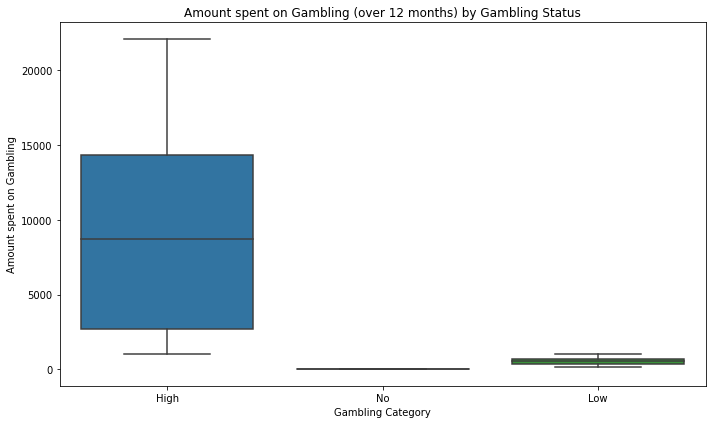

In [75]:
# Boxplot to see the outliers for the column T_GAMBLING_12 (total amount gambled away over 12 months) against the 
# category of gambling tendancy cloumn, CAT_GAMBLING, which has 3 categories, High, Low and No.

plt.figure(figsize=(10, 6), facecolor='white')
sns.boxplot(x='CAT_GAMBLING', y='T_GAMBLING_12', data=credit_df)
plt.title('Amount spent on Gambling (over 12 months) by Gambling Status')
plt.xlabel('Gambling Category')
plt.ylabel('Amount spent on Gambling')
# Ensure that all components are properly spaced and displayed.
plt.tight_layout()
plt.show()

# There is not a single outlier in the T_GAMBLING_12 column shown on the boxplot graph when plotted against the 
# status of Gambling tendancy which makes total sense. 

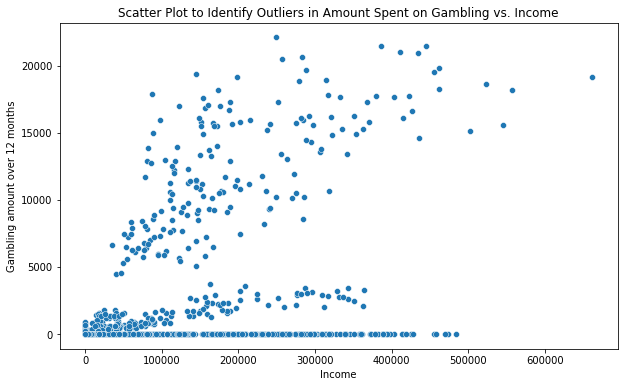

In [76]:
# Create a scatter plot to show how 'Gambling amount over 12 months' compares to 'Income'
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(x='INCOME', y='T_GAMBLING_12', data=credit_df)

# Add title and labels
plt.title('Scatter Plot to Identify Outliers in Amount Spent on Gambling vs. Income')
plt.xlabel('Income')
plt.ylabel('Gambling amount over 12 months')

# Show the plot
plt.show()

# I can clearly infer from the scatterplot that there are 3 positive linear progression patterns that 
# correspond to the 3 gambling tendancy catgories (High, Low and No). Similar to the boxplot above, the below 
# scatterplot proves that there are zero outliers in the T_GAMBLING_12 column.

In [ ]:
# Based on my analysis above I am convinced that there is no irregular data in the dataset.
# So, I am NOT going to remove any data.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [77]:
# I want to remove all the columns that contain ratio values, easily obtained from other columns.
    
# There are several ratio columns:
# R_DEBT_SAVINGS, R_SAVINGS_INCOME, R_DEBT_INCOME
# R_CLOTHING, R_CLOTHING_SAVINGS, R_CLOTHING_DEBT, R_CLOTHING_INCOME  
# R_EDUCATION, R_EDUCATION_SAVINGS, R_EDUCATION_DEBT, R_EDUCATION_INCOME  
# R_ENTERTAINMENT, R_ENTERTAINMENT_SAVINGS, R_ENTERTAINMENT_DEBT, R_ENTERTAINMENT_INCOME 
# R_FINES, R_FINES_SAVINGS, R_FINES_DEBT, R_FINES_INCOME 
# R_GAMBLING, R_GAMBLING_SAVINGS, R_GAMBLING_DEBT, R_GAMBLING_INCOME  
# R_GROCERIES, R_GROCERIES_SAVINGS, R_GROCERIES_DEBT, R_GROCERIES_INCOME 
# R_HEALTH, R_HEALTH_SAVINGS, R_HEALTH_DEBT, R_HEALTH_INCOME 
# R_HOUSING, R_HOUSING_SAVINGS, R_HOUSING_DEBT, R_HOUSING_INCOME  
# R_TAX, R_TAX_SAVINGS, R_TAX_DEBT, R_TAX_INCOME  
# R_TRAVEL, R_TRAVEL_SAVINGS, R_TRAVEL_DEBT, R_TRAVEL_INCOME 
# R_UTILITIES, R_UTILITIES_SAVINGS, R_UTILITIES_DEBT, R_UTILITIES_INCOME 
# R_EXPENDITURE, R_EXPENDITURE_SAVINGS, R_EXPENDITURE_DEBT, R_EXPENDITURE_INCOME 

# shape of the dataframe before dropping the columns.
print(credit_df.shape)

# Dropping the ratio columns:
credit_df = credit_df.drop(columns=['R_DEBT_SAVINGS', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
'R_CLOTHING', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'R_CLOTHING_INCOME',  
'R_EDUCATION', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'R_EDUCATION_INCOME',  
'R_ENTERTAINMENT', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'R_ENTERTAINMENT_INCOME', 
'R_FINES', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_FINES_INCOME', 
'R_GAMBLING', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'R_GAMBLING_INCOME',  
'R_GROCERIES', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'R_GROCERIES_INCOME', 
'R_HEALTH', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'R_HEALTH_INCOME', 
'R_HOUSING', 'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'R_HOUSING_INCOME',  
'R_TAX', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'R_TAX_INCOME',  
'R_TRAVEL', 'R_TRAVEL_SAVINGS', 'R_TRAVEL_DEBT', 'R_TRAVEL_INCOME', 
'R_UTILITIES', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT', 'R_UTILITIES_INCOME', 
'R_EXPENDITURE', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT', 'R_EXPENDITURE_INCOME'])

# shape of the dataframe after dropping the columns.
print(credit_df.shape)

# Checking for duplicate data
print("There are", credit_df.duplicated().sum(),"duplicated rows.")


(1000, 87)
(1000, 36)
There are 0 duplicated rows.


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [80]:
credit_df.head(25)
# From a look at the top 25 entries and the EDA I have done so far, I dont see any inconsistent data.
# The datatypes of data in the colomns are consistent and uniform.

,CUST_ID,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_EDUCATION_6,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,...,T_EXPENDITURE_12,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,1889,945,0,0,3068,1554,...,33269,19286,High,True,True,True,True,True,444,1
1,C02OZKC0ZF,77158,91187,315648,5818,111,0,0,17244,8694,...,70144,25114,No,True,True,True,True,True,625,0
2,C03FHP2D0A,30917,21642,534864,1157,860,0,0,3611,2231,...,30917,17618,High,True,True,True,True,True,469,1
3,C03PVPPHOY,80657,64526,629125,6857,3686,4402,2215,13446,6849,...,80657,40205,High,True,True,True,True,True,559,0
4,C04J69MUX0,149971,1172498,2399531,1978,322,0,0,5194,2675,...,136337,62766,High,True,True,True,True,True,473,0
5,C04Q46QKOG,181636,339055,1695274,11446,1910,5680,2864,21832,11142,...,121091,54562,No,True,True,True,True,True,596,0
6,C069MLDS7X,60881,42617,383550,2658,117,0,0,10264,5207,...,60881,34195,No,True,True,True,True,True,580,0
7,C07VC05Z4R,220838,186863,2225362,4383,1272,0,0,35845,18388,...,169875,50076,No,True,True,True,True,True,596,0
8,C0CLKGEG1L,78615,62892,110061,5912,2346,0,0,23931,13578,...,78615,41071,High,True,True,True,True,True,638,0
9,C0DYD1C2G1,174000,1502729,411273,2831,812,0,0,8683,5556,...,158182,66205,High,True,True,True,True,True,636,0


In [81]:

# There are 6 columns that have categorical data with binary values 1s and 0s representing True and False
# CAT_DEBT: 1 if the customer has debt; 0 otherwise
# CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
# CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
# CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
# CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise

# There are some advantages to changing the 1s and 0s to True and False like readability, compatibility
# (some programming languages have built in support for boolean datatypes) and working with boolean values 
# can simplify logical operations. 

# Changing the binary columns to boolean
credit_df['CAT_DEBT'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_CREDIT_CARD'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_MORTGAGE'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_SAVINGS_ACCOUNT'] = credit_df['CAT_DEBT'].astype(bool)
credit_df['CAT_DEPENDENTS'] = credit_df['CAT_DEBT'].astype(bool)

credit_df['CAT_GAMBLING'].value_counts()
# There are 3 unique categories without any spaces.

CAT_GAMBLING
No      620
High    264
Low     116
Name: count, dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
No. I only found some unnecessary columns. The data is pretty clean. I also changed the category columns with binary data from 1s and 0s to True and False. I dropped multiple columns that are just the ratios of other columns.

2. Did the process of cleaning your data give you new insights into your dataset?
I understood the data mostly during the EDA/checkpoint. Cleaning the data did help me get more familiar with the dataset.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
I would like to explore the outliers more. They seem to make sense at this stage of the data analysis. I also want to create categories for the credit score column and identify any patterns possibly present.
I am not interested in exploring the ratio colmuns further from the perspective of my business issue, and dropped the columns. However, I am not sure if they might prove to be interesting figures to work with in Tableau.

